In [4]:
from alphafold.partition import *
MS2_hairpin = 'GGAGGAUCACCC'
test_sequences = [ MS2_hairpin,'CCCGCGGCCGGAGGAUCACCCGGCCGCGGG']
test_sequence = test_sequences[0]
(Z, bpp, Z_final ) = partition( test_sequence)

sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 4410948.75391


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap( bpp, linewidths=0.1,square=True, vmin=0, vmax=1,ax=ax)

In [6]:
def find_MS2( sequence ):
    i = test_sequence.find( MS2_hairpin )
    j = i + len( MS2_hairpin ) - 1
    assert test_sequence.find( MS2_hairpin, j ) == -1
    return (i,j)

In [7]:
(i,j) = find_MS2( test_sequence )
print bpp[i][j]

0.925630940717


In [8]:
test_sequences = [ MS2_hairpin,'CCCGCGGCC'+MS2_hairpin+'GGCCGCGGG',\
                   MS2_hairpin+'AAAAAAAAAAAAA','AAACGAACGACCA'+MS2_hairpin+'AAACAAAGAAAA',\
                    'GGGC'+MS2_hairpin,MS2_hairpin+'GGGC',
                 'AAACCAGCGACGAGGACGACGAGCGACGACGACGAGCGACGACAAACC'+MS2_hairpin,
                 'AAACCAGCGACGAGGACGACGAAACC'+MS2_hairpin+'CAAGAGGAAAAACCCAAAAAAGCAAC',
                 'AAAAGAGAGAAACAAAGACAGACAAA'+MS2_hairpin+'AAAAAGAAACAACCAAAGAAAGAAAG',
                 'CCGCGCCGCGCGCGCGGGCGCGGCGC'+MS2_hairpin+'CGCGCGGCGCGGCGCGCGCGCGGGGG'
                 ]
bpps = []
for test_sequence in test_sequences:
    (Z, bpp, Z_final ) = partition( test_sequence )
    (i,j) = find_MS2( test_sequence )
    bpps.append( bpp[i][j] )
print 'BPP:', bpps

sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 4410948.75391
sequence = CCCGCGGCCGGAGGAUCACCCGGCCGCGGG
cutpoint = -----------------------------X
circle   =  False
Z = 1.2602303299e+22
sequence = GGAGGAUCACCCAAAAAAAAAAAAA
cutpoint = ------------------------X
circle   =  False
Z = 4410948.75391
sequence = AAACGAACGACCAGGAGGAUCACCCAAACAAAGAAAA
cutpoint = ------------------------------------X
circle   =  False
Z = 2.12980134941e+14
sequence = GGGCGGAGGAUCACCC
cutpoint = ---------------X
circle   =  False
Z = 2246567238.82
sequence = GGAGGAUCACCCGGGC
cutpoint = ---------------X
circle   =  False
Z = 2594905446.4
sequence = AAACCAGCGACGAGGACGACGAGCGACGACGACGAGCGACGACAAACCGGAGGAUCACCC
cutpoint = -----------------------------------------------------------X
circle   =  False
Z = 1.71036713409e+36
sequence = AAACCAGCGACGAGGACGACGAAACCGGAGGAUCACCCCAAGAGGAAAAACCCAAAAAAGCAAC
cutpoint = ---------------------------------------------------------------X
circle   =  False
Z = 2.05

In [101]:
params = AlphaFoldParams()
Kd_BPs = [ 2**x for x in range(-3,3)]
all_bpps = []
for test_sequence in test_sequences:
    bpps = []
    for Kd_BP in Kd_BPs:
        params.Kd_BP = Kd_BP
        (Z, bpp, Z_final ) = partition( test_sequence, params )
        (i,j) = find_MS2( test_sequence )
        bpps.append( bpp[i][j] )
    all_bpps.append( bpps)
print 'BPP:', all_bpps

sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 1.52843185
sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 1.253142225
sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 1.1238985375
sequence = GGAGGAUCACCC
cutpoint = -----------X
circle   =  False
Z = 1.061292975


AssertionError: 

(10, 30)


[Text(0,0.5,u'bpp, relative to control'), Text(0.5,0,u'Kd_BP (M)')]

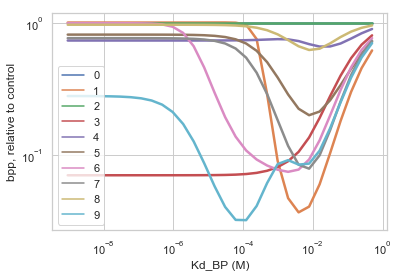

In [100]:
import pandas as pd
d = np.array(all_bpps)
d = d / np.tile( d[0,:], (d.shape[0],1) ) 
data = pd.DataFrame( d, columns = Kd_BPs ) #, index = test_sequences )
ax.set(xscale="log", yscale="log")
g = sns.lineplot( data = data.transpose(), dashes=False,linewidth=2.5 )
g.set_xscale( 'log' )
g.set_yscale( 'log' )
g.set(xlabel='Kd_BP (M)',ylabel='bpp, relative to control' )